<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-some-data" data-toc-modified-id="Create-some-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create some data</a></span><ul class="toc-item"><li><span><a href="#Get-sample" data-toc-modified-id="Get-sample-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get sample</a></span></li><li><span><a href="#Assign-groups-(randomly)" data-toc-modified-id="Assign-groups-(randomly)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Assign groups (randomly)</a></span></li><li><span><a href="#Check-for-that-groups-in-sample-are-similar-in-regards-to-random-variable" data-toc-modified-id="Check-for-that-groups-in-sample-are-similar-in-regards-to-random-variable-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Check for that groups in sample are similar in regards to random variable</a></span><ul class="toc-item"><li><span><a href="#Plot-visually" data-toc-modified-id="Plot-visually-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Plot visually</a></span></li><li><span><a href="#Can-also-do-a-hypothesis-test" data-toc-modified-id="Can-also-do-a-hypothesis-test-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Can also do a hypothesis test</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For consistency
seed = 72
np.random.seed(seed)

# Create some data

In [2]:
n = 9001
sim_ids = np.arange(n)
sim_df = pd.DataFrame(data=sim_ids,columns=['ids'] )
sim_df.head()

,ids
0,0
1,1
2,2
3,3
4,4


In [3]:
random_var1 = np.random.normal(0, 5, sim_ids.size)
random_var2 = np.random.normal(4, 2, sim_ids.size)
sim_df['var1'] = pd.Series(random_var1, index=sim_df.index)
sim_df['var2'] = pd.Series(random_var2, index=sim_df.index)

sim_df.head()

,ids,var1,var2
0,0,1.592727,0.500382
1,1,-3.397797,4.927748
2,2,-11.041942,3.330705
3,3,2.951201,5.835964
4,4,8.373830,4.580326


## Get sample

In [4]:
# Getting a random sample from the population
n_samples = 200
samples_df = sim_df.sample(n_samples, random_state=seed)
samples_df.describe()

,ids,var1,var2
count,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946
std,2368.773293,5.190724,2.051522
min,142.000000,-12.737091,-1.783443
25%,2374.000000,-3.186165,2.868998
50%,3852.500000,0.325406,4.228844
75%,6036.500000,3.278900,5.483611
max,8929.000000,13.291145,8.380286


## Assign groups (randomly)

>  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html

In [5]:
# Note this is a uniform distribution
is_control = np.random.choice([0,1], size=n_samples)
samples_df = samples_df.assign(is_control=is_control)
samples_df.describe()

,ids,var1,var2,is_control
count,200.000000,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946,0.485000
std,2368.773293,5.190724,2.051522,0.501029
min,142.000000,-12.737091,-1.783443,0.000000
25%,2374.000000,-3.186165,2.868998,0.000000
50%,3852.500000,0.325406,4.228844,0.000000
75%,6036.500000,3.278900,5.483611,1.000000
max,8929.000000,13.291145,8.380286,1.000000


Do assignments look good?

## Check for that groups in sample are similar in regards to random variable

### Plot visually

<Axes: xlabel='var1', ylabel='Density'>

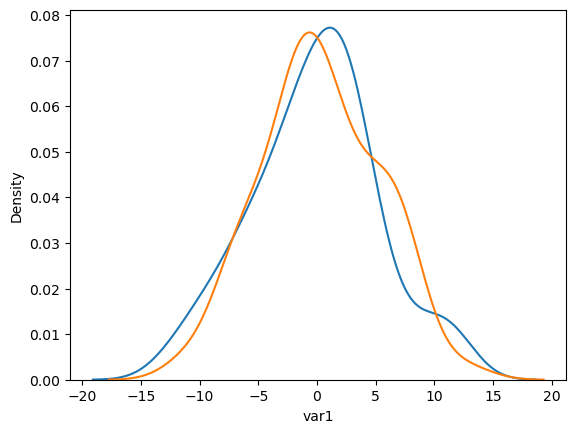

In [6]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var1)
sns.kdeplot(samples_df[samples_df.is_control == 1].var1)

<Axes: xlabel='var2', ylabel='Density'>

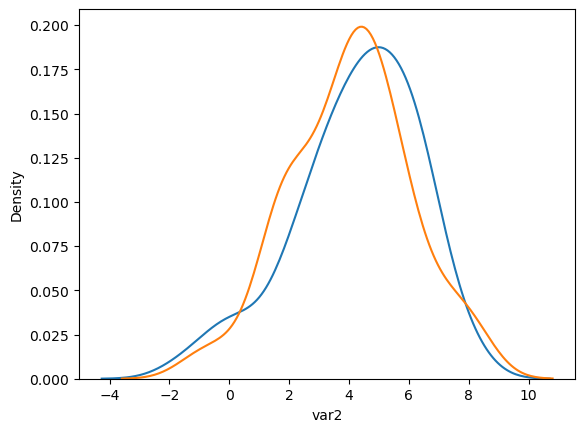

In [7]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var2)
sns.kdeplot(samples_df[samples_df.is_control == 1].var2)

<Axes: xlabel='var1', ylabel='Density'>

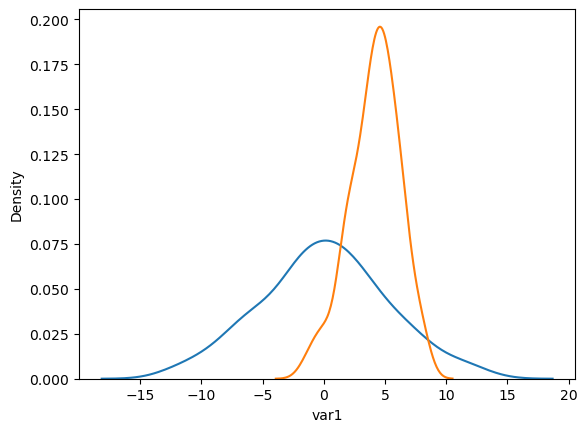

In [8]:
sns.kdeplot(samples_df.var1)
sns.kdeplot(samples_df.var2)

### Can also do a hypothesis test

In [9]:
from scipy import stats

In [10]:
def is_significant(group1, group2, alpha=0.05):    
    # Is it significant? Welch's
    t,p = stats.ttest_ind(group1,group2,equal_var=False)
    return p<alpha, p

In [11]:
def experiment_vs_control(df, var_name, alpha=0.05):
    #
    experiment = df[df.is_control == 0][var_name]
    control = df[df.is_control == 1][var_name]
    # 
    return is_significant(experiment, control, alpha)

In [12]:
experiment_vs_control(samples_df, 'var2')

(False, 0.42978681439524635)

In [13]:
is_significant(samples_df.var1,samples_df.var2)

(True, 2.84912539013435e-21)